Import the list of all metro stations that we want to evaluate as options

In [1]:
import json
import requests

In [2]:
# The code was removed by Watson Studio for sharing.

,id_amat,nome,linee,lat,long
0,889,TRE TORRI,5,45.478140,9.156675
1,890,ZARA,3,45.492664,9.192601
2,890,ZARA,5,45.492664,9.192601
3,891,WAGNER,1,45.467950,9.155914
4,892,VIMODRONE,2,45.515783,9.285989


In [3]:
df.shape

(113, 5)

Let's build the map of Milano and plot into the map all the different metro stations

In [4]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='Milano_user')
Mil = geolocator.geocode('Milano,Italy')

print((Mil.latitude, Mil.longitude))

(45.4668, 9.1905)


In [5]:
!conda install -c conda-forge folium=0.5.0 
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [6]:
Milano_map = folium.Map(location = [Mil.latitude, Mil.longitude], 
                                        zoom_start = 12 ) 

Milano_map

In [7]:
for a,b in zip(df['lat'],df['long']):
    folium.CircleMarker(
        [a, b],
        radius=1,
        popup='a',
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Milano_map)  
Milano_map

In [9]:

body = client_740b91c707af459e94746fab74e9e377.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-ec5sxy0o8n53nc',Key='tpl_metrosequenza.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_order = pd.read_excel(body)
print(df_order.head())
print(df_order.shape)


   percorso  num  id_ferm
0    100002    7      891
1    100002   24      893
2    100002   21      898
3    100002   26      902
4    100002   25      903
(790, 3)


The file includes way more entries than the unique numbers of metro station.

In [10]:
#let's import in the new database with the order of the metro stations their names
df_order=df_order.rename(columns={"id_ferm": "id_amat"})
df2=pd.merge(df_order,df,how='left',on=['id_amat'])
df2.head()

,percorso,num,id_amat,nome,linee,lat,long
0,100002,7,891,WAGNER,1,45.467950,9.155914
1,100002,24,893,VILLA S.G.,1,45.517455,9.226130
2,100002,21,898,TURRO,1,45.500446,9.221005
3,100002,26,902,SESTO RONDO,1,45.534159,9.231246
4,100002,25,903,SESTO MARELLI,1,45.523477,9.227962


Our goal is to extrapolate from the file the order of the metro stations by line to draw the map.
1- We identify the first stations of each lines:
    green - Assago and Abbiategrasso
    red - Bisceglie and Rho Fiera
    yellow - San Donato
    purple - San Siro
2- for each of the above we will select all the 

In [11]:
Terminal=['ASSAGO MILANOFIORI FORUM','ABBIATEGRASSO','COLOGNO NORD','BISCEGLIE','RHO FIERAMILANO','SAN DONATO', 'SAN SIRO STADIO']
Colour=['green','green','green','red','red','yellow','purple']
Line=['M2','M2','M2','M1','M1','M3','M5']
df_lines=pd.DataFrame({'Terminal': Terminal, 'Colour':Colour, 'Line':Line},columns=['Terminal','Colour','Line'])
df_lines

,Terminal,Colour,Line
0,ASSAGO MILANOFIORI FORUM,green,M2
1,ABBIATEGRASSO,green,M2
2,COLOGNO NORD,green,M2
3,BISCEGLIE,red,M1
4,RHO FIERAMILANO,red,M1
5,SAN DONATO,yellow,M3
6,SAN SIRO STADIO,purple,M5


In [16]:
Percorsi=[]
for t in Terminal:
    df3=df2[(df2['nome']==t) & (df2['num']==1)]
    list= df3['percorso'].tolist()
    x= df2[df2.percorso.isin(list)].percorso.value_counts().idxmax()
    Percorsi.append(x)
print(Percorsi)

[100053, 100048, 100067, 100002, 100030, 100082, 100089]


In [17]:
df_lines.insert(3,'percorso',Percorsi)
df_lines

,Terminal,Colour,Line,percorso
0,ASSAGO MILANOFIORI FORUM,green,M2,100053
1,ABBIATEGRASSO,green,M2,100048
2,COLOGNO NORD,green,M2,100067
3,BISCEGLIE,red,M1,100002
4,RHO FIERAMILANO,red,M1,100030
5,SAN DONATO,yellow,M3,100082
6,SAN SIRO STADIO,purple,M5,100089


In [18]:
df4=df2[df2.percorso.isin(Percorsi)]
df4=pd.merge(df4,df_lines,how='left',on=['percorso'])
df4=df4.sort_values(by=['Line','percorso','num'])
df4.head()

,percorso,num,id_amat,nome,linee,lat,long,Terminal,Colour,Line
25,100002,1,990,BISCEGLIE,1,45.455380,9.112926,BISCEGLIE,red,M1
16,100002,2,949,INGANNI,1,45.457563,9.122263,BISCEGLIE,red,M1
9,100002,3,920,PRIMATICCIO,1,45.459414,9.129260,BISCEGLIE,red,M1
26,100002,4,993,BANDE NERE,1,45.461504,9.136485,BISCEGLIE,red,M1
18,100002,5,957,GAMBARA,1,45.464896,9.143028,BISCEGLIE,red,M1


In [19]:
prev_coordinates = None
prev_line = '1'
for line, lat, long, col in zip(df4['percorso'],df4['lat'],df4['long'],df4['Colour']):
    if line != prev_line:
        prev_coordinates = None    
    if prev_coordinates != None:
        folium.PolyLine([prev_coordinates, (lat,long)], color=col).add_to(Milano_map)    
    prev_line = line
    prev_coordinates = (lat,long)    

In [20]:
Milano_map

# FourSquare API

In [21]:
# The code was removed by Watson Studio for sharing.

### First of all, I investigate the Foursquare data to extract all the top available categories (10) which are included in two lists: one with the names and the other with the id.

In [22]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [23]:
# get the total number of categories
cat_num = len(results['response']['categories'])
# create two lists with the names and the ids of the top line categories
cat_name_list=[]
cat_id_list=[]
for w in range(cat_num):
    cat_name_list.append(results['response']['categories'][w]['name'])
    cat_id_list.append(results['response']['categories'][w]['id'])

print(cat_name_list)
print(cat_id_list)
    

['Arts & Entertainment', 'College & University', 'Event', 'Food', 'Nightlife Spot', 'Outdoors & Recreation', 'Professional & Other Places', 'Residence', 'Shop & Service', 'Travel & Transport']
['4d4b7104d754a06370d81259', '4d4b7105d754a06372d81259', '4d4b7105d754a06373d81259', '4d4b7105d754a06374d81259', '4d4b7105d754a06376d81259', '4d4b7105d754a06377d81259', '4d4b7105d754a06375d81259', '4e67e38e036454776db1fb3a', '4d4b7105d754a06378d81259', '4d4b7105d754a06379d81259']


### For each of the categories we will fetch from Foursquare API the total number of venues that will be included in a new dataframe

In [24]:
# Create the new dataframe for appending categories results
df_test=df.copy()
for c in cat_name_list:
    df_test[c] = 0
df_test.head()

,id_amat,nome,linee,lat,long,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,889,TRE TORRI,5,45.478140,9.156675,0,0,0,0,0,0,0,0,0,0
1,890,ZARA,3,45.492664,9.192601,0,0,0,0,0,0,0,0,0,0
2,890,ZARA,5,45.492664,9.192601,0,0,0,0,0,0,0,0,0,0
3,891,WAGNER,1,45.467950,9.155914,0,0,0,0,0,0,0,0,0,0
4,892,VIMODRONE,2,45.515783,9.285989,0,0,0,0,0,0,0,0,0,0


In [27]:
for p,rows in df_test.iterrows():
    print(p)
    for x,y in zip(cat_name_list,cat_id_list):
        try:
            lat=df_test['lat'][p]
            long=df_test['long'][p]
            categoryId = y
            radius=1000
            cat_num_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                long, 
                radius,
                categoryId    )
            df_test.loc[p,x]= requests.get(cat_num_url).json()['response']['totalResults']
        except:
            0
    

85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


In [36]:
df_test.head()

,id_amat,nome,linee,lat,long,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,889,TRE TORRI,5,45478140,9156675,5,14,1,124,25,31,31,2,31,39
1,890,ZARA,3,45492664,9192601,13,12,0,153,40,35,32,6,26,67
2,890,ZARA,5,45492664,9192601,13,12,0,153,40,35,32,6,26,67
3,891,WAGNER,1,45467950,9155914,8,9,1,118,30,41,22,8,45,42
4,892,VIMODRONE,2,45515783,9285989,2,2,0,7,7,6,11,3,4,2


## Exploratory Analisys

In [41]:
#create a copy of the dataframe for the analysis
df_exp=df_test.copy()
df_exp.head()

,id_amat,nome,linee,lat,long,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,889,TRE TORRI,5,45478140,9156675,5,14,1,124,25,31,31,2,31,39
1,890,ZARA,3,45492664,9192601,13,12,0,153,40,35,32,6,26,67
2,890,ZARA,5,45492664,9192601,13,12,0,153,40,35,32,6,26,67
3,891,WAGNER,1,45467950,9155914,8,9,1,118,30,41,22,8,45,42
4,892,VIMODRONE,2,45515783,9285989,2,2,0,7,7,6,11,3,4,2


In [42]:
#drop all text columns which are not needed
df_exp.drop(df_exp.columns[0:5], 1, inplace=True)
df_exp.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,5,14,1,124,25,31,31,2,31,39
1,13,12,0,153,40,35,32,6,26,67
2,13,12,0,153,40,35,32,6,26,67
3,8,9,1,118,30,41,22,8,45,42
4,2,2,0,7,7,6,11,3,4,2


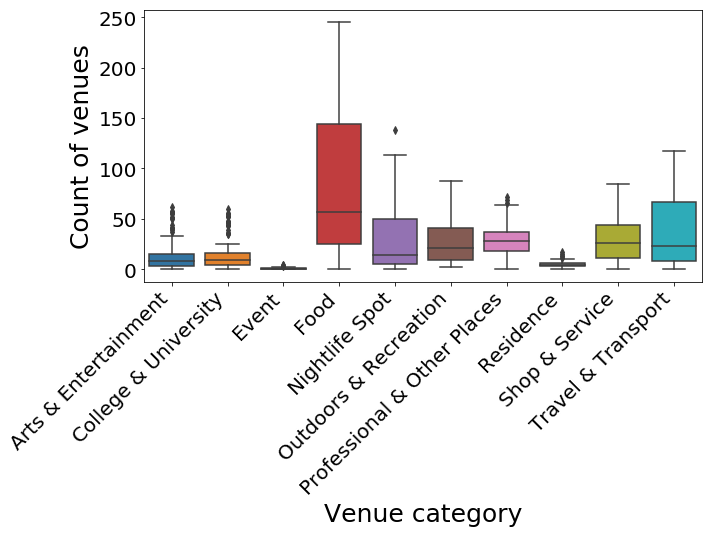

In [44]:
#create a boxplot to analyze the distribution of the different venues categories
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = df_exp)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [45]:
#normalize the data
from sklearn import preprocessing
normalized_data = preprocessing.normalize(df_exp)
df_expN=pd.DataFrame(normalized_data)
df_expN.head()

,0,1,2,3,4,5,6,7,8,9
0,0.034810,0.097469,0.006962,0.863300,0.174052,0.215825,0.215825,0.013924,0.215825,0.271522
1,0.071811,0.066287,0.000000,0.845162,0.220957,0.193338,0.176766,0.033144,0.143622,0.370104
2,0.071811,0.066287,0.000000,0.845162,0.220957,0.193338,0.176766,0.033144,0.143622,0.370104
3,0.055221,0.062124,0.006903,0.814510,0.207079,0.283008,0.151858,0.055221,0.310618,0.289910
4,0.117041,0.117041,0.000000,0.409644,0.409644,0.351123,0.643726,0.175562,0.234082,0.117041


In [61]:
#rename the columns headers importing the categories from list previously created
for k,l in zip(cat_name_list,df_expN):
    df_expN.rename(columns={l:k},inplace=True)

In [62]:
df_expN.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.034810,0.097469,0.006962,0.863300,0.174052,0.215825,0.215825,0.013924,0.215825,0.271522
1,0.071811,0.066287,0.000000,0.845162,0.220957,0.193338,0.176766,0.033144,0.143622,0.370104
2,0.071811,0.066287,0.000000,0.845162,0.220957,0.193338,0.176766,0.033144,0.143622,0.370104
3,0.055221,0.062124,0.006903,0.814510,0.207079,0.283008,0.151858,0.055221,0.310618,0.289910
4,0.117041,0.117041,0.000000,0.409644,0.409644,0.351123,0.643726,0.175562,0.234082,0.117041


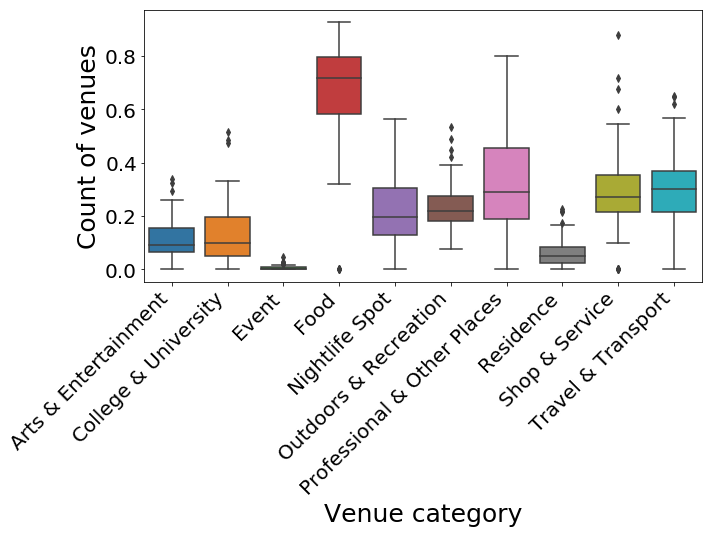

In [63]:
#create a boxplot to analyze the distribution of normalized data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = df_expN)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

## Clustering Data

In [111]:
df_expN.drop(df_expN.columns[10:14], 1, inplace=True)

In [112]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_expN)
kmeans_labels = kmeans.labels_

In [113]:
#add clisters and named back to the dataframe
df_expN['cluster']=kmeans_labels
df_expN['nome']=df['nome']


In [114]:
df_expN.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,cluster,nome
0,0.034810,0.097469,0.006962,0.863300,0.174052,0.215825,0.215825,0.013924,0.215825,0.271522,0,TRE TORRI
1,0.071811,0.066287,0.000000,0.845162,0.220957,0.193338,0.176766,0.033144,0.143622,0.370104,0,ZARA
2,0.071811,0.066287,0.000000,0.845162,0.220957,0.193338,0.176766,0.033144,0.143622,0.370104,0,ZARA
3,0.055221,0.062124,0.006903,0.814510,0.207079,0.283008,0.151858,0.055221,0.310618,0.289910,0,WAGNER
4,0.117041,0.117041,0.000000,0.409644,0.409644,0.351123,0.643726,0.175562,0.234082,0.117041,2,VIMODRONE


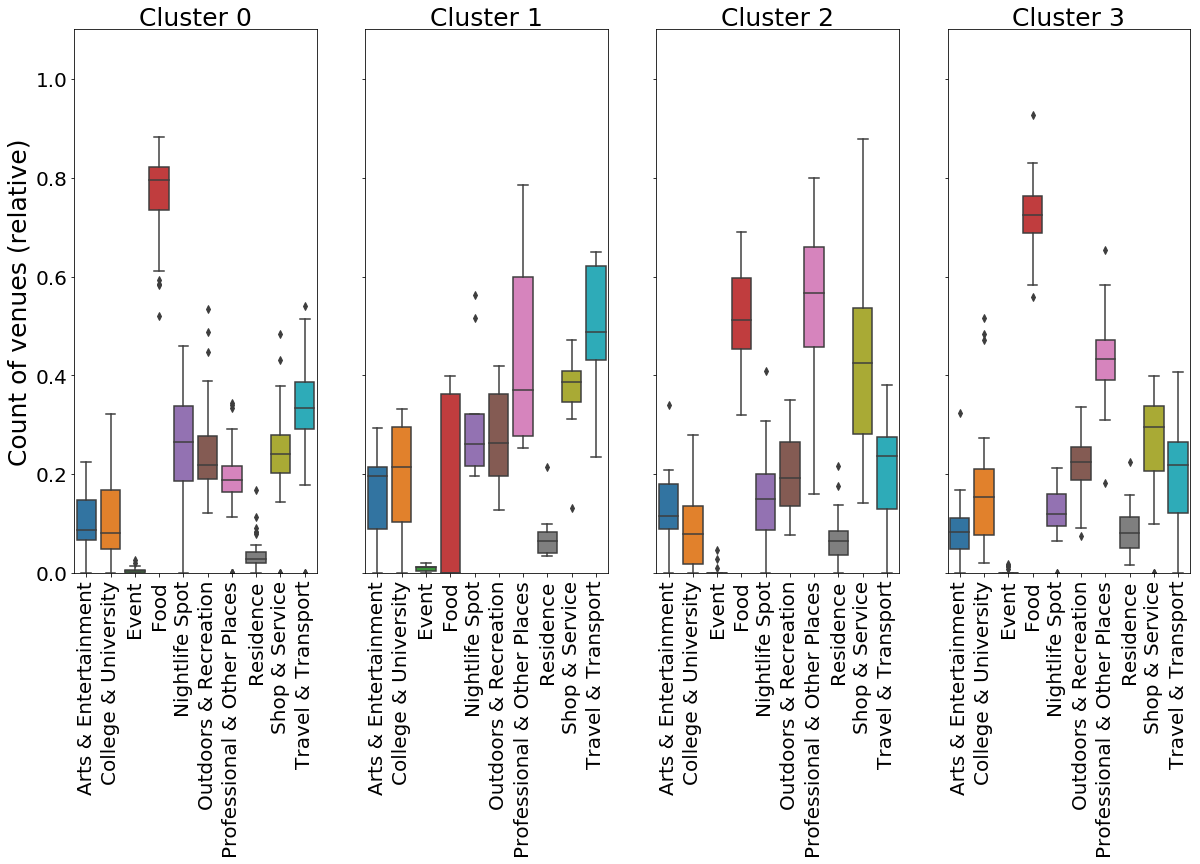

In [115]:
#viz stack boxplot for different clusters
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = df_expN[df_expN['cluster'] == k].drop('cluster',1), ax=axes[k])

plt.show()

In [116]:
df_expN['lat']=df['lat']
df_expN['long']=df['long']
pd.set_option('display.max_rows', None)
df_expN

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,cluster,nome,lat,long
0,0.034810,0.097469,0.006962,0.863300,0.174052,0.215825,0.215825,0.013924,0.215825,0.271522,0,TRE TORRI,45.478140,9.156675
1,0.071811,0.066287,0.000000,0.845162,0.220957,0.193338,0.176766,0.033144,0.143622,0.370104,0,ZARA,45.492664,9.192601
2,0.071811,0.066287,0.000000,0.845162,0.220957,0.193338,0.176766,0.033144,0.143622,0.370104,0,ZARA,45.492664,9.192601
3,0.055221,0.062124,0.006903,0.814510,0.207079,0.283008,0.151858,0.055221,0.310618,0.289910,0,WAGNER,45.467950,9.155914
4,0.117041,0.117041,0.000000,0.409644,0.409644,0.351123,0.643726,0.175562,0.234082,0.117041,2,VIMODRONE,45.515783,9.285989
5,0.196532,0.294798,0.019653,0.000000,0.196532,0.137573,0.727170,0.098266,0.471678,0.235839,1,VILLA S.G.,45.517455,9.226130
6,0.084515,0.084515,0.000000,0.338062,0.000000,0.338062,0.422577,0.084515,0.676123,0.338062,2,VILLA POMPEA,45.527849,9.384974
7,0.196537,0.327561,0.000000,0.000000,0.262049,0.196537,0.786146,0.065512,0.131024,0.327561,1,VILLA FIORITA,45.520740,9.345971
8,0.085319,0.106649,0.000000,0.533244,0.000000,0.191968,0.661223,0.063989,0.426595,0.191968,2,URUGUAY,45.493717,9.120546
9,0.038777,0.029082,0.000000,0.727060,0.174494,0.242353,0.339295,0.000000,0.378071,0.348989,0,UDINE,45.491204,9.236996


In [117]:

cluster_map = folium.Map(location = [Mil.latitude, Mil.longitude], 
                                        zoom_start = 12 )
# set color scheme for the clusters
rainbow=['red','blue','yellow','orange']

for a,b,c,d in zip(df_expN['nome'],df_expN['cluster'],df_expN['lat'],df_expN['long']):
    folium.CircleMarker(
        [c,d],
        radius=5,
        popup='a',
        color=rainbow[b],
        fill=True,
        fill_color=rainbow[b],
        fill_opacity=0.7,
        parse_html=False).add_to(cluster_map)  
cluster_map